# <span style="color:brown">Project 2 : Ames Housing Data and Kaggle Challenge</span>
---
## <span style="color:Blue">Model Iterations - Model #4 and #5</span>

#### Ryan McDonald, General Assembly
---

### Step 1: Reading the Data 
**Imports/ Read The Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
train = pd.read_csv("../datasets/project_data/clean_train.csv")
pd.set_option('display.max_columns', 75)
train.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,mo_sold,yr_sold,saleprice,ms_zoning_RH,ms_zoning_RL,...,kitchen_qual_Gd,kitchen_qual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_RFn,garage_finish_Unf,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,total_baths,tot_fin_sq,home_age
0,60,68.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,3,2010,130500,0,1,...,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2.5,2012.0,34
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,4,2009,220000,0,1,...,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,3.5,2759.0,13
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,1,2010,109000,0,1,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2.0,1788.0,57
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,4,2010,174000,0,1,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2.5,1444.0,4
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,3,2010,138500,0,1,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.0,1445.0,110


### Step 2: Running Models!
**Kaggle Formating Below Each Model Iteration**

### MODEL #4

   **-4th Model will include polynomial features**
   
   **-Conducting model with top 10 best-correlated features (X) to target variable(y) of 'saleprice'**
    


In [3]:
features = ['overall_qual','tot_fin_sq','gr_liv_area','garage_area',
            'garage_cars','total_bsmt_sf','1st_flr_sf','total_baths',
            'year_built','year_remod/add']

In [4]:
X = train[features]
y = train['saleprice']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42 )

#### Polynomial Features (Multi)Linear Regression Model 4

In [6]:
pf = PolynomialFeatures(include_bias=False)
pf.fit(X_train)

PolynomialFeatures(include_bias=False)

**Polynomial Transformation**

In [7]:
X_train_pf = pf.transform(X_train)

In [8]:
X_test_pf = pf.transform(X_test)

In [9]:
polytrain= pd.DataFrame(X_train_pf, columns=pf.get_feature_names(X.columns))
polytrain

,overall_qual,tot_fin_sq,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,total_baths,year_built,year_remod/add,overall_qual^2,overall_qual tot_fin_sq,overall_qual gr_liv_area,overall_qual garage_area,overall_qual garage_cars,overall_qual total_bsmt_sf,overall_qual 1st_flr_sf,overall_qual total_baths,overall_qual year_built,overall_qual year_remod/add,tot_fin_sq^2,tot_fin_sq gr_liv_area,tot_fin_sq garage_area,tot_fin_sq garage_cars,tot_fin_sq total_bsmt_sf,tot_fin_sq 1st_flr_sf,tot_fin_sq total_baths,tot_fin_sq year_built,tot_fin_sq year_remod/add,gr_liv_area^2,gr_liv_area garage_area,gr_liv_area garage_cars,gr_liv_area total_bsmt_sf,gr_liv_area 1st_flr_sf,gr_liv_area total_baths,gr_liv_area year_built,gr_liv_area year_remod/add,garage_area^2,garage_area garage_cars,garage_area total_bsmt_sf,garage_area 1st_flr_sf,garage_area total_baths,garage_area year_built,garage_area year_remod/add,garage_cars^2,garage_cars total_bsmt_sf,garage_cars 1st_flr_sf,garage_cars total_baths,garage_cars year_built,garage_cars year_remod/add,total_bsmt_sf^2,total_bsmt_sf 1st_flr_sf,total_bsmt_sf total_baths,total_bsmt_sf year_built,total_bsmt_sf year_remod/add,1st_flr_sf^2,1st_flr_sf total_baths,1st_flr_sf year_built,1st_flr_sf year_remod/add,total_baths^2,total_baths year_built,total_baths year_remod/add,year_built^2,year_built year_remod/add,year_remod/add^2
0,6.0,2063.0,1664.0,420.0,2.0,1004.0,1004.0,2.0,1947.0,1950.0,36.0,12378.0,9984.0,2520.0,12.0,6024.0,6024.0,12.0,11682.0,11700.0,4255969.0,3432832.0,866460.0,4126.0,2071252.0,2071252.0,4126.0,4016661.0,4022850.0,2768896.0,698880.0,3328.0,1670656.0,1670656.0,3328.0,3239808.0,3244800.0,176400.0,840.0,421680.0,421680.0,840.0,817740.0,819000.0,4.0,2008.0,2008.0,4.0,3894.0,3900.0,1008016.0,1008016.0,2008.0,1954788.0,1957800.0,1008016.0,2008.0,1954788.0,1957800.0,4.00,3894.0,3900.0,3790809.0,3796650.0,3802500.0
1,7.0,2549.0,2009.0,400.0,2.0,989.0,1245.0,2.0,1939.0,1950.0,49.0,17843.0,14063.0,2800.0,14.0,6923.0,8715.0,14.0,13573.0,13650.0,6497401.0,5120941.0,1019600.0,5098.0,2520961.0,3173505.0,5098.0,4942511.0,4970550.0,4036081.0,803600.0,4018.0,1986901.0,2501205.0,4018.0,3895451.0,3917550.0,160000.0,800.0,395600.0,498000.0,800.0,775600.0,780000.0,4.0,1978.0,2490.0,4.0,3878.0,3900.0,978121.0,1231305.0,1978.0,1917671.0,1928550.0,1550025.0,2490.0,2414055.0,2427750.0,4.00,3878.0,3900.0,3759721.0,3781050.0,3802500.0
2,7.0,2602.0,2157.0,487.0,2.0,924.0,1216.0,2.5,1966.0,1966.0,49.0,18214.0,15099.0,3409.0,14.0,6468.0,8512.0,17.5,13762.0,13762.0,6770404.0,5612514.0,1267174.0,5204.0,2404248.0,3164032.0,6505.0,5115532.0,5115532.0,4652649.0,1050459.0,4314.0,1993068.0,2622912.0,5392.5,4240662.0,4240662.0,237169.0,974.0,449988.0,592192.0,1217.5,957442.0,957442.0,4.0,1848.0,2432.0,5.0,3932.0,3932.0,853776.0,1123584.0,2310.0,1816584.0,1816584.0,1478656.0,3040.0,2390656.0,2390656.0,6.25,4915.0,4915.0,3865156.0,3865156.0,3865156.0
3,6.0,1196.0,1196.0,528.0,2.0,684.0,684.0,1.0,1920.0,2000.0,36.0,7176.0,7176.0,3168.0,12.0,4104.0,4104.0,6.0,11520.0,12000.0,1430416.0,1430416.0,631488.0,2392.0,818064.0,818064.0,1196.0,2296320.0,2392000.0,1430416.0,631488.0,2392.0,818064.0,818064.0,1196.0,2296320.0,2392000.0,278784.0,1056.0,361152.0,361152.0,528.0,1013760.0,1056000.0,4.0,1368.0,1368.0,2.0,3840.0,4000.0,467856.0,467856.0,684.0,1313280.0,1368000.0,467856.0,684.0,1313280.0,1368000.0,1.00,1920.0,2000.0,3686400.0,3840000.0,4000000.0
4,5.0,967.0,967.0,180.0,1.0,967.0,967.0,1.0,1920.0,1990.0,25.0,4835.0,4835.0,900.0,5.0,4835.0,4835.0,5.0,9600.0,9950.0,935089.0,935089.0,174060.0,967.0,935089.0,935089.0,967.0,1856640.0,1924330.0,935089.0,174060.0,967.0,935089.0,935089.0,967.0,1856640.0,1924330.0,32400.0,180.0,174060.0,174060.0,180.0,345600.0,358200.0,1.0,967.0,967.0,1.0,1920.0,1990.0,935089.0,935089.0,967.0,1856640.0,1924330.0,935089.0,967.0,1856640.0,1924330.0,1.00,1920.0,1990.0,3686400.0,3820800.0,3960100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

**Model Evaluation**

In [10]:
lr = LinearRegression()
lr.fit(X_train_pf, y_train)

LinearRegression()

**R2 for train and test data in Model 4**

In [11]:
lr.score(X_train_pf, y_train), lr.score(X_test_pf, y_test)

(0.9180347041907585, 0.8630229247140648)

In [12]:
r2_testscore= lr.score(X_test_pf, y_test)

**Adjusted R2 for Model 4**

In [13]:
1 - (1-lr.score(X_train_pf, y_train))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.9176215726594619

**RSME for Model 4**

In [14]:
predictions = lr.predict(X_train_pf)

In [15]:
predictions.shape

(1496,)

In [16]:
np.sqrt(metrics.mean_squared_error(y_train, predictions))

21343.156869180355

### Data Visualizations

In [17]:
# Need to bring train['saleprice'] into polytrain
polytrain['saleprice']= train['saleprice']
#polytrain['predictions']= predictions
polytrain['saleprice'].shape

(1496,)

### Model 4 Kaggle Test Setup!

In [18]:
kaggle_test = pd.read_csv('../datasets/project_data/test.csv', keep_default_na = False, na_values = [''])

In [19]:
kaggle_test.columns = kaggle_test.columns.str.replace(' ', '_') 
kaggle_test.columns = kaggle_test.columns.str.lower()

In [20]:
kaggle_test.shape

(878, 80)

In [21]:
kaggle_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,...,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,...,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,...,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,...,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,...,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,...,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD


In [22]:
kaggle_test['total_baths']= ((kaggle_test['bsmt_full_bath']+ kaggle_test['full_bath']) + (kaggle_test['bsmt_half_bath'] + kaggle_test['half_bath'])* 0.5)

kaggle_test['tot_fin_sq'] =kaggle_test['bsmtfin_sf_1']+ kaggle_test['bsmtfin_sf_2']+ kaggle_test['gr_liv_area']

kaggle_test['home_age'] = kaggle_test['yr_sold']- kaggle_test['year_built']

kaggle_test['garage_age'] = kaggle_test['yr_sold']- kaggle_test['garage_yr_blt']

In [23]:
kaggle_test_subset=kaggle_test[features] 

In [24]:
trans_kaggle_subset =pf.transform(kaggle_test_subset)

In [25]:
trans_kaggle_subset.shape

(878, 65)

In [26]:
kaggle_preds = lr.predict(trans_kaggle_subset)


In [27]:
preds_dict ={
    'Id' : kaggle_test['id'],
    'SalePrice' : kaggle_preds
}

In [28]:
preds_df = pd.DataFrame(preds_dict)
preds_df

,Id,SalePrice
0,2658,137189.253799
1,2718,162369.868440
2,2414,185109.329425
3,1989,122579.109359
4,625,161900.602744
...,...,...
873,1662,192642.857336
874,1234,214463.970392
875,1373,124483.787647
876,1672,115783.535359


In [29]:
preds_df.to_csv('../datasets/kaggle_submissions/mod4_predictions_no_index.csv', index= False)

### MODEL #5

   **-5th Model will include Polynommial Features with StandardScalar Preprocessing and Ridge (L2) Regularization**
   
   **-Conducting model with top 18 best-correlated features (X) to target variable(y) of 'saleprice'**
    


In [30]:
features = ['overall_qual','tot_fin_sq','gr_liv_area','garage_area',
            'garage_cars','total_bsmt_sf','1st_flr_sf','total_baths',
            'year_built','year_remod/add','foundation_PConc','full_bath',
            'exter_qual_Gd','totrms_abvgrd','mas_vnr_area','bsmtfin_type_1_GLQ',
            'fireplaces','neighborhood_NridgHt']

In [31]:
X = train[features]
y = train['saleprice']

In [32]:
# Instantiate PolynomialFeatures!
poly = PolynomialFeatures(degree = 2, interaction_only= False, include_bias = False)
X_pfit = poly.fit_transform(X)
X_pfit.shape

(1995, 189)

In [33]:
# Create train/test splits

X_train, X_test, y_train, y_test = train_test_split(X_pfit, y, test_size= 0.5, random_state=42)


In [34]:
#Scaling the data

sc=StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [35]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (997, 189)
y_train shape is: (997,)
Z_test shape is: (998, 189)
y_test shape is: (998,)


**Model 5 Evaluation**

In [36]:
# How does the model score with scaled test data?

lr = LinearRegression()
lr.fit(Z_train, y_train)

LinearRegression()

**Adjusted R2 for Model 5 (train, test)**

In [37]:
1 - (1-lr.score(Z_train, y_train))*(len(y)-1)/(len(y)-X.shape[1]-1), 1 - (1-lr.score(Z_test, y_test))*(len(y)-1)/(len(y)-X.shape[1]-1)

(0.9406270365230955, 0.8763236202630088)

**R2 for train and test data in Model 5**
    
   **-Improvement over Model 4 on Testing Data!**

In [38]:

print(f"SS Training R=Squared: {lr.score(Z_train, y_train)}")
print(f"SS Testing R=Squared: {lr.score(Z_test, y_test)}")

SS Training R=Squared: 0.9411630010880826
SS Testing R=Squared: 0.8774400569908252


**RSME for Model 5**

  **-Improvement over Model 4 as well!**

In [39]:
predictions = lr.predict(Z_test)

In [40]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

25565.5058032761

**L2/Ridge Regularization**

In [41]:
# Will need to trial different Alphas (more below)
ridge= Ridge(alpha = 20)

In [42]:
ridge.fit(Z_train, y_train)

Ridge(alpha=20)

In [43]:
print(f"Ridge Training R=Squared: {ridge.score(Z_train, y_train)}")
print(f"Ridge Testing R=Squared: {ridge.score(Z_test, y_test)}")

Ridge Training R=Squared: 0.9233439251179487
Ridge Testing R=Squared: 0.8977593608291072


**Alpha-Optimization**

In [44]:
r_alphas = np.logspace(0, 5, 100);   

# Cross-validate over the list of Ridge Alphas

ridge_cv = RidgeCV(alphas = r_alphas, scoring = 'r2', cv = 5)

# Fit model using best Ridge Alpha

ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [45]:
ridge_cv.alpha_

25.95024211399736

In [46]:
print(f"Ridge CV Training R=Squared: {ridge_cv.score(Z_train, y_train)}")
print(f"Ridge CV Testing R=Squared: {ridge_cv.score(Z_test, y_test)}")

Ridge CV Training R=Squared: 0.9219599730042914
Ridge CV Testing R=Squared: 0.898080287248404


In [47]:
ridge_2 = Ridge(alpha = ridge_cv.alpha_)    #Fit a single ridge model with best alpha
ridge_2.fit(Z_train, y_train)
ridge_2.predict(Z_test)
ridge_2
#THEN CALCULATE MSE/ RMSE

Ridge(alpha=25.95024211399736)

In [48]:
predictions_2 = ridge_2.predict(Z_test)

In [49]:
np.sqrt(metrics.mean_squared_error(y_test, predictions_2))

23313.592965798038

**RMSE is a little higher with Ridge, but still could be very good! Variance is decreased**

### Data Visualization

In [50]:
resids = y_test - predictions_2

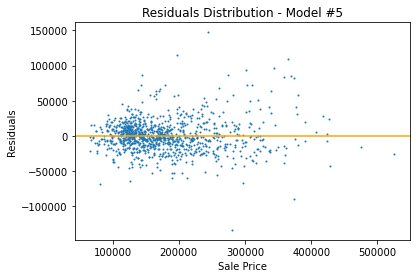

In [51]:
plt.scatter(predictions_2, resids, s=1)
plt.axhline(0, color="orange")
plt.xlabel('Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals Distribution - Model #5')
plt.show()

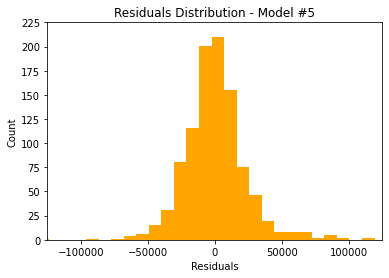

In [52]:

plt.hist(resids, bins=30, color = 'orange');
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals Distribution - Model #5')

plt.xlim(-125000, 125000)
plt.ylim(0, 225)
plt.show()

### Model 5 Kaggle Test Setup!
**-Conducting Same EDA as the Train Data to Match Columns/etc.**

In [53]:
kaggle_test = pd.read_csv('../datasets/project_data/test.csv', keep_default_na = False, na_values = [''])

In [54]:
kaggle_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,...,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,...,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,...,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,...,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,...,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,...,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD


In [55]:
kaggle_Id = kaggle_test[['Id']]

In [56]:
kaggle_test.columns = kaggle_test.columns.str.replace(' ', '_') 
kaggle_test.columns = kaggle_test.columns.str.lower()
kaggle_test.drop(columns=['alley', 'fireplace_qu', 'fence','low_qual_fin_sf', 'pool_qc','misc_feature', 'misc_val', 'utilities'], inplace=True)

In [57]:
kaggle_test.shape

(878, 72)

In [58]:
kaggle_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,1928,0,0,2,0,4,2,Fa,9,Typ,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,1967,0,0,2,0,6,2,TA,10,Typ,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,1496,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,968,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,7,2009,WD


In [59]:
kaggle_object = kaggle_test.select_dtypes(include=['object'])
features = kaggle_test.loc[ : , kaggle_object.columns] 
dummies = pd.get_dummies(data=features, drop_first=True)
kaggle_test=pd.concat([kaggle_test, dummies], axis=1)
kaggle_test.shape

(878, 261)

In [60]:
kaggle_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,...,kitchen_qual_Gd,kitchen_qual_Po,kitchen_qual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Typ,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,garage_qual_Gd,garage_qual_NA,garage_qual_Po,garage_qual_TA,garage_cond_Fa,garage_cond_Gd,garage_cond_NA,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,...,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,...,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,...,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1


**Conducting neccessary EDA on Kaggle Data**

In [61]:
kaggle_test.isnull().sum().sort_values(ascending = False).head()

lot_frontage     160
garage_yr_blt     45
garage_finish      1
electrical         1
mas_vnr_type       1
dtype: int64

#### Dropping Primary 'Object' dtype columns. Dummy columns to remain

In [62]:
kaggle_objects = kaggle_test.select_dtypes(['object'])


kaggle_test.drop(columns=['ms_zoning','street','lot_shape','land_contour',
                          'lot_config','land_slope','neighborhood','condition_1',
                          'condition_2','bldg_type','house_style','roof_style',
                          'roof_matl','exterior_1st','exterior_2nd','mas_vnr_type',
                          'exter_qual','exter_cond','foundation','bsmt_qual',
                          'bsmt_cond','bsmt_exposure','bsmtfin_type_1',
                          'bsmtfin_type_2','heating','heating_qc','central_air',
                          'electrical','kitchen_qual','functional','garage_type',
                          'garage_finish','garage_qual','garage_cond','paved_drive',
                          'sale_type'], inplace=True)

np.nan_to_num(kaggle_test['lot_frontage'], copy=False, nan=68);

kaggle_test['garage_yr_blt'].fillna(0, inplace = True)
kaggle_test['mas_vnr_area'].fillna(0, inplace = True)

kaggle_test.isnull().sum().sort_values(ascending= False)

sale_type_WD            0
exterior_1st_BrkComm    0
condition_1_PosA        0
condition_1_Norm        0
condition_1_Feedr       0
                       ..
exter_cond_Gd           0
exter_cond_Fa           0
exter_qual_TA           0
exter_qual_Gd           0
id                      0
Length: 225, dtype: int64

**Adding additional engineered features**

In [63]:
kaggle_test['total_baths']= ((kaggle_test['bsmt_full_bath']+ kaggle_test['full_bath']) + (kaggle_test['bsmt_half_bath'] + kaggle_test['half_bath'])* 0.5)

kaggle_test['tot_fin_sq'] =kaggle_test['bsmtfin_sf_1']+ kaggle_test['bsmtfin_sf_2']+ kaggle_test['gr_liv_area']

kaggle_test['home_age'] = kaggle_test['yr_sold']- kaggle_test['year_built']

kaggle_test['garage_age'] = kaggle_test['yr_sold']- kaggle_test['garage_yr_blt']

**Modeling**

In [64]:
features = ['overall_qual','tot_fin_sq','gr_liv_area','garage_area',
            'garage_cars','total_bsmt_sf','1st_flr_sf','total_baths',
            'year_built','year_remod/add','foundation_PConc','full_bath',
            'exter_qual_Gd','totrms_abvgrd','mas_vnr_area','bsmtfin_type_1_GLQ',
            'fireplaces','neighborhood_NridgHt']

In [65]:
kaggle_test_subset=kaggle_test[features] 

In [66]:
trans_kaggle_subset =poly.transform(kaggle_test_subset)


In [67]:
trans_kaggle_subset.shape

(878, 189)

In [68]:
trans_kaggle_subset

array([[6.000e+00, 1.928e+03, 1.928e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+00, 1.967e+03, 1.967e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [7.000e+00, 2.050e+03, 1.496e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [5.000e+00, 1.953e+03, 1.211e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.000e+00, 1.480e+03, 8.640e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+00, 1.718e+03, 9.250e+02, ..., 4.000e+00, 0.000e+00,
        0.000e+00]])

In [69]:

sc=StandardScaler()
kaggle_test= sc.fit_transform(trans_kaggle_subset)


In [70]:
kaggle_pred = ridge_2.predict(kaggle_test)


In [71]:
pred_series = pd.Series(kaggle_pred)


In [72]:
kaggle_test.shape

(878, 189)

In [73]:
kaggle_Id

,Id
0,2658
1,2718
2,2414
3,1989
4,625
...,...
873,1662
874,1234
875,1373
876,1672


In [74]:
kaggle_submission=pd.concat([kaggle_Id, pred_series], axis=1)


In [75]:
kaggle_submission.columns

Index(['Id', 0], dtype='object')

In [76]:
kaggle_submission.rename({0: 'SalePrice'}, axis = 'columns', inplace = True)


In [77]:
kaggle_submission

,Id,SalePrice
0,2658,135250.389104
1,2718,155211.692517
2,2414,186610.148401
3,1989,123349.005047
4,625,175999.447933
...,...,...
873,1662,192607.415703
874,1234,191768.140619
875,1373,146835.081240
876,1672,122966.531637


In [78]:
submission_df = pd.DataFrame(kaggle_submission)

In [79]:
submission_df.to_csv('../datasets/kaggle_submissions/mod5_predictions_no_index.csv', index= False)